In [154]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

## Linear regression

### Constants initializing

In [ ]:
np.random.seed(42)
data_set_size = 500
a = 2
b = 7

### Generating dataset

In [89]:
noise = np.random.normal(0, 1, data_set_size)
train_set_x = np.random.uniform(0, 1, data_set_size)
train_set_y = a + b* train_set_x 
train_set_y_noised = train_set_y +  noise

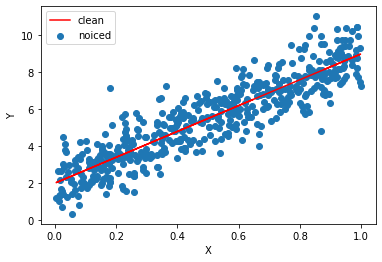

In [95]:
plt.scatter(train_set_x,train_set_y_noised,label='noiced')
plt.plot(train_set_x, train_set_y, c='red',label='clean')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Gradient descend

In [102]:
def gradient(X, Y, iterations=5000, learning_rate = 0.01):
    a_curr = np.random.randint(0, 50)
    b_curr = np.random.randint(0, 50)
    for i in range(iterations):
        y_pred = a_curr + b_curr * X
        loss = Y - y_pred 
        a_grad = -2 * loss.mean()
        b_grad = -2 * (X * loss).mean()
        a_curr = a_curr - learning_rate * a_grad
        b_curr = b_curr - learning_rate * b_grad
    return a_curr, b_curr


In [110]:
a_pred, b_pred = gradient(train_set_x, train_set_y_noised)
print('Actual params: a = ', a, ' b = ',  b)
print('Predicted params:  a = ', a_pred, ' b = ',  b_pred)
print('Difference:  a: ', np.abs(a - a_pred), ' b: ',  np.abs(b - b_pred))

Actual params: a =  2  b =  7
Predicted params:  a =  2.0228085292811144  b =  6.967842754802253
Difference:  a:  0.02280852928111443  b:  0.03215724519774721


## Logistic regression

In [122]:
class_size = 500
data_set_size = class_size * 2

### Dataset generation

In [144]:
class1_mean, class1_cov = [1, 2],  [[2, 0], [0, 2]]
class2_mean, class2_cov = [5, 7],  [[3, 0], [0, 3]]
class1 = np.random.multivariate_normal(class1_mean, class1_cov, class_size)
class2 = np.random.multivariate_normal(class2_mean, class2_cov, class_size)

X = np.concatenate([class1, class2])
Y = np.array([0] * class_size + [1] *  class_size)

X, Y = shuffle(X, Y, random_state=42)

train_size = int(data_set_size*0.7)

train_set_x, test_set_x = X[:train_size,:], X[train_size:,:]
train_set_y, test_set_y = Y[:train_size], Y[train_size:]

print(test_set_x.shape)
print(train_set_x.shape)
print(test_set_y.shape)
print(train_set_y.shape)

(300, 2)
(700, 2)
(300,)
(700,)


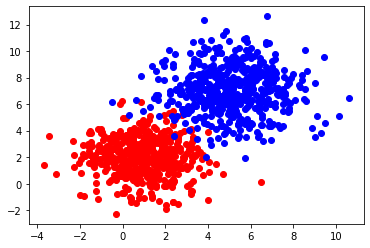

In [135]:
plt.scatter(class1[:, 0], class1[:, 1], color='red')
plt.scatter(class2[:, 0], class2[:, 1], color='blue')

In [138]:
def logistic_regression(X, Y, iterations=5000, learning_rate = 0.01) :
        m, n = X.shape
        W = np.zeros(n)
        b = 0
        for i in range(iterations ) :
            A = 1 / ( 1 + np.exp( - (X.dot(W ) + b ) ) )
            tmp = ( A - Y.T )
            tmp = np.reshape( tmp, m )
            dW = np.dot( X.T, tmp ) / m
            db = np.sum( tmp ) / m
            W = W - learning_rate * dW
            b = b - learning_rate * db
        return W, b

def predict(W, b, X) :
    Z = 1 / ( 1 + np.exp( - ( X.dot( W ) + b ) ) )
    Y = np.where( Z > 0.5, 1, 0 )
    return Y

In [156]:
W, b =  logistic_regression(train_set_x, train_set_y)
y_pred_test = predict(W, b, test_set_x)
print('Accuracy: ', accuracy_score(y_pred_test, test_set_y))

Accuracy:  0.9633333333333334
